In [2]:
# You will need to import these libraries for the program to work
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Read in the API key from the api.keys file in the same directory as this notebook.  Change if necessary
#with open("api.keys", "r") as keyfile:
#    api_key = keyfile.readlines()[1]

# Create a list for housing the dataframes collected from the API
#dataframes = []
#stock_list = ["META", "AAPL", "AMZN", "NFLX", "GOOGL"]

# This is the for loop to get the dataframe.  You will need to place the api key variable in curly brackets in order for it to read correctly.
#for stock_name in stock_list:
#    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=' + \
#        stock_name + '&interval=1day&apikey={api_key}'
#    r = requests.get(url)
#    data = r.json()
#    dataframe = pd.DataFrame.from_dict(data["Time Series (Daily)"]).transpose()
#    dataframe.columns = ["Open", "High", "Low", "Close",
#                         "Adjusted Close", "Volume", "Dividend Amount", "Split Coefficient"]
#    dataframe["Stock Name"] = stock_name
#    dataframes.append(dataframe)

# Concatentate all of the dataframes into one large dataframe
#final_dataframe = pd.concat(dataframes)


In [4]:
# Write the final dataframe to a file
#with open("stockmarketdata.csv", "w") as file:
#    file.write(final_dataframe.to_csv(
#        lineterminator='\n', index=True, index_label="Date"))


In [5]:
# To avoid querying the API and writing the file, I wrote the data to disk and read it in here.
with open("stockmarketdata.csv", "r") as file:
    stocks = pd.read_csv(file)


In [6]:
# Data Cleaning and Creating new rows
stocks["date"] = pd.to_datetime(stocks["date"])
stocks.set_index(stocks.date, inplace=True)
adjust_vals = stocks[(stocks["Stock Name"]=="GOOGL") & (stocks.Close > 500)][["Open", "High", "Low", "Close"]]/20
stocks.loc[stocks.date.between("2022-06-28","2022-07-15") & (stocks["Stock Name"] == "GOOGL"), "Open":"Close"] = adjust_vals
stocks["DayRange"] = stocks.High - stocks.Low
stocks["TotalTradedValue"] = stocks.Volume * stocks["Adjusted Close"]


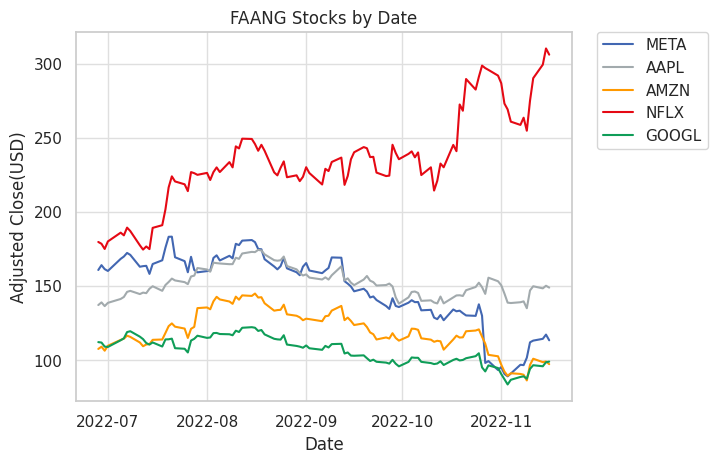

In [7]:
sns.set_theme(style = "whitegrid",rc={"grid.color":"#DFDFDF"})
sns.set_palette(palette = ["#4267B2","#A2AAAD","#FF9900","#E50914","#0F9D58"])
sns.lineplot(x="date", y="Adjusted Close", data=stocks, hue="Stock Name").set(
    title="FAANG Stocks by Date", ylabel="Adjusted Close(USD)", xlabel = "Date")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("../stat386-projects/assets/images/EDA/FAANG_lineplot.png", bbox_inches = "tight")

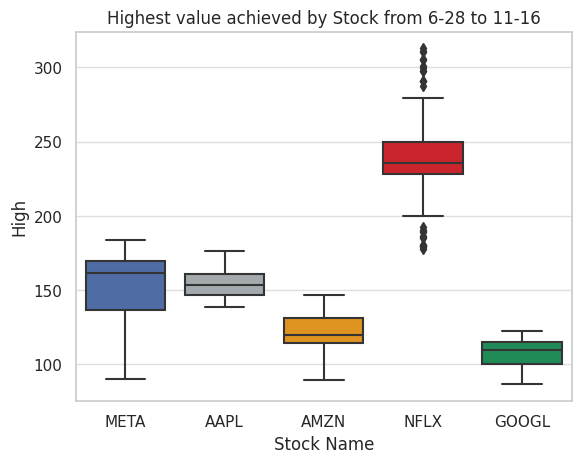

In [8]:
sns.boxplot(data = stocks, x = "Stock Name", y = "High").set(title = "Highest value achieved by Stock from 6-28 to 11-16")
plt.savefig("../stat386-projects/assets/images/EDA/FAANG_boxplot_highs.png", bbox_inches = "tight")

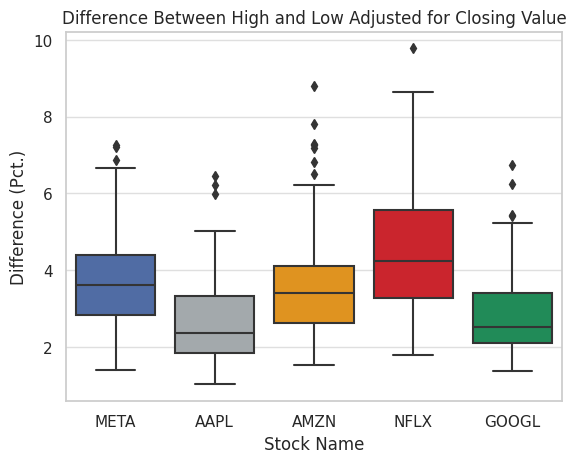

In [9]:
sns.boxplot(data = stocks, x = "Stock Name", y = stocks.DayRange/stocks.Close*100).set(title = "Difference Between High and Low Adjusted for Closing Value", ylabel = "Difference (Pct.)")
plt.savefig("../stat386-projects/assets/images/EDA/FAANG_boxplot_differences.png", bbox_inches = "tight")

In [1]:
sns.lineplot(x="date", y = "Volume", data=stocks, hue="Stock Name").set(title = "Volume Of Stocks (Millions of Shares)", ylabel = "Number of Shares (Millions)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("../stat386-projects/assets/images/EDA/FAANG_lineplot_volume.jpg", bbox_inches = "tight")

NameError: name 'sns' is not defined

NameError: name 'tight' is not defined

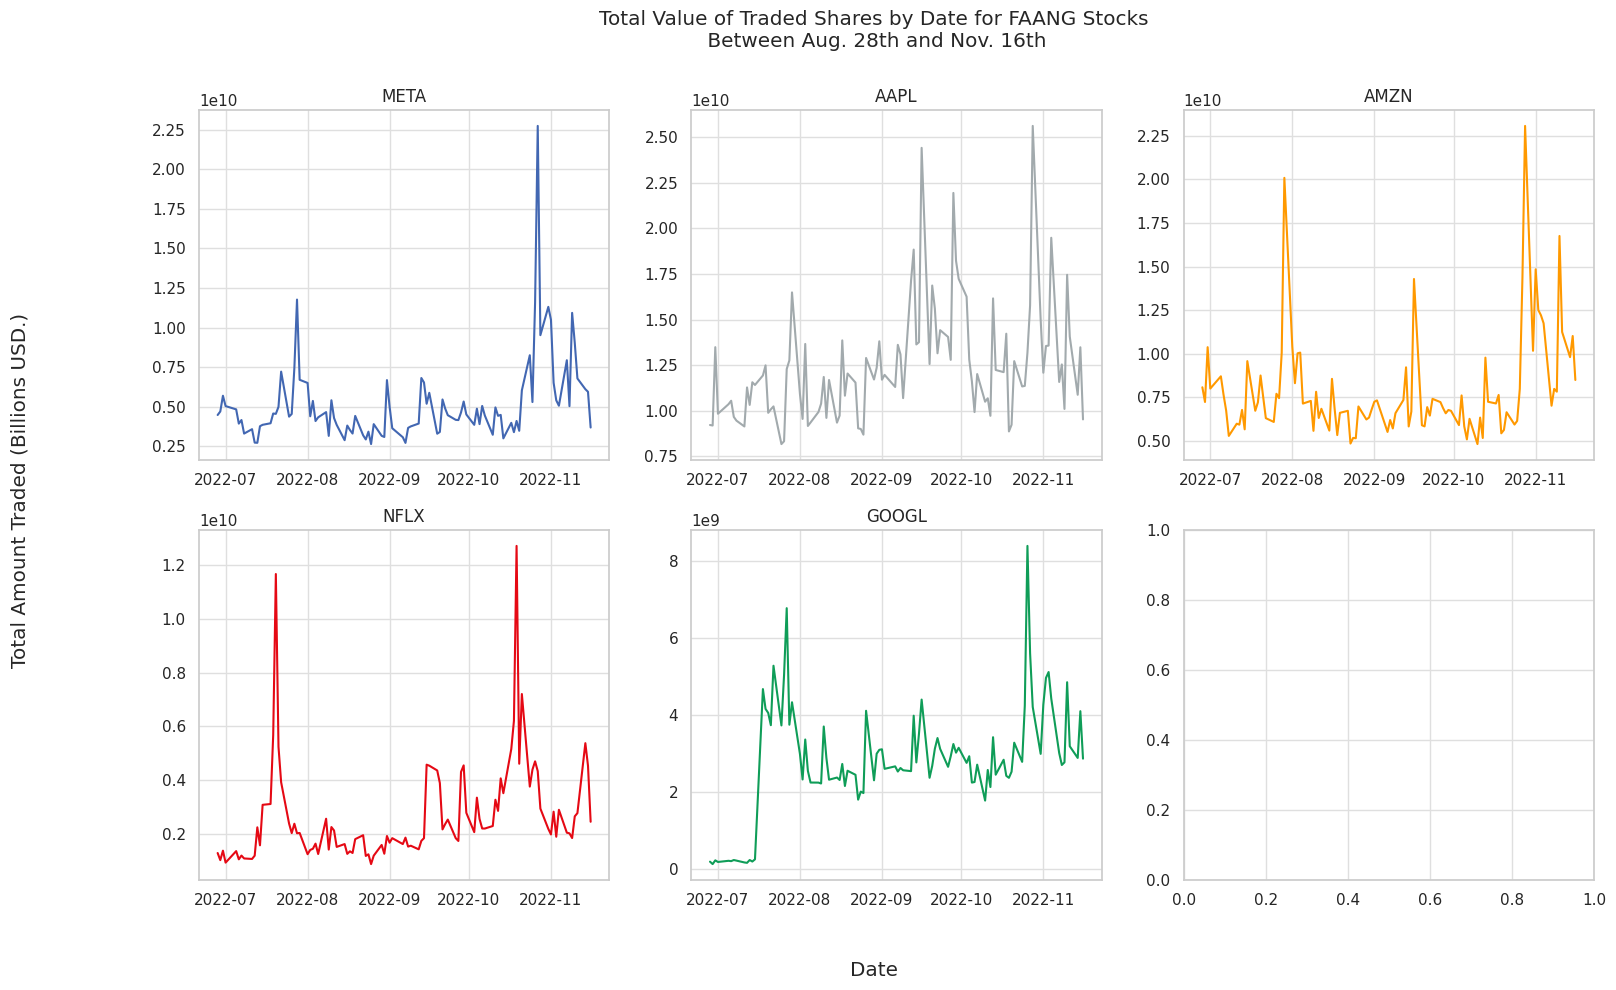

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Total Value of Traded Shares by Date for FAANG Stocks\n Between Aug. 28th and Nov. 16th')
fig.supylabel("Total Amount Traded (Billions USD.)")
fig.supxlabel("Date")
sns.lineplot(ax=axes[0, 0], data=stocks[stocks["Stock Name"]=="META"], x='date', y="TotalTradedValue", color = "#4267B2").set(title = "META", ylabel = "", xlabel = "")
sns.lineplot(ax=axes[0, 1], data=stocks[stocks["Stock Name"]=="AAPL"], x='date', y='TotalTradedValue', color = "#A2AAAD").set(title = "AAPL", ylabel = "", xlabel = "")
sns.lineplot(ax=axes[0, 2], data=stocks[stocks["Stock Name"]=="AMZN"], x='date', y='TotalTradedValue', color = "#FF9900").set(title = "AMZN", ylabel = "", xlabel = "")
sns.lineplot(ax=axes[1, 0], data=stocks[stocks["Stock Name"]=="NFLX"], x='date', y='TotalTradedValue', color = "#E50914").set(title = "NFLX", ylabel = "", xlabel = "")
sns.lineplot(ax=axes[1, 1], data=stocks[stocks["Stock Name"]=="GOOGL"], x='date', y='TotalTradedValue', color = "#0F9D58").set(title = "GOOGL", ylabel = "", xlabel = "")
plt.savefig("../stat386-projects/assets/images/EDA/FAANG_lineplot_totalvaluetraded.png", bbox_inches = tight)